In [105]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [106]:
data = pd.read_csv('songs.csv', header = 0, engine='python')
data

,year,songtitle,artistname,songID,artistID,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,...,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
0,2010,This Is the House That Doubt Built,A Day to Remember,SOBGGAB12C5664F054,AROBSHL1187B9AFB01,3,0.853,-4.262,91.525,0.953,...,82.475,-52.025,39.116,-35.368,71.642,-126.440,18.658,-44.770,25.989,0
1,2010,Sticks & Bricks,A Day to Remember,SOPAQHU1315CD47F31,AROBSHL1187B9AFB01,4,1.000,-4.051,140.048,0.921,...,106.918,-61.320,35.378,-81.928,74.574,-103.808,121.935,-38.892,22.513,0
2,2010,All I Want,A Day to Remember,SOOIZOU1376E7C6386,AROBSHL1187B9AFB01,4,1.000,-3.571,160.512,0.489,...,80.621,-59.773,45.979,-46.293,59.904,-108.313,33.300,-43.733,25.744,0
3,2010,It's Complicated,A Day to Remember,SODRYWD1315CD49DBE,AROBSHL1187B9AFB01,4,1.000,-3.815,97.525,0.794,...,96.675,-78.660,41.088,-49.194,95.440,-102.676,46.422,-59.439,37.082,0
4,2010,2nd Sucks,A Day to Remember,SOICMQB1315CD46EE3,AROBSHL1187B9AFB01,4,0.788,-4.707,140.053,0.286,...,110.332,-56.450,37.555,-48.588,67.570,-52.796,22.888,-50.414,32.758,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7569,1990,She's Gone,Y&T,SOSIEQB12A6D4FC59D,ARGQANQ11F50C4769E,4,1.000,-10.197,93.140,0.859,...,38.120,-66.638,50.105,-40.692,43.763,-59.707,49.414,-53.970,68.303,0
7570,1990,Let It Out,Y&T,SOIGIQI12A6D4FC59E,ARGQANQ11F50C4769E,4,1.000,-12.392,79.858,0.196,...,83.454,-83.707,44.124,-51.628,69.929,-97.153,36.745,-61.243,56.902,0
7571,1990,Ten Lovers,Y&T,SOLNEQO12A6D4FC59F,ARGQANQ11F50C4769E,4,0.984,-10.304,91.760,0.592,...,103.413,-101.464,36.152,-45.387,48.352,-57.103,67.641,-53.729,65.176,0
7572,1990,Goin' Off The Deep End,Y&T,SOEMJEP12A58A7E7B5,ARGQANQ11F50C4769E,4,0.907,-9.295,110.907,0.838,...,108.688,-55.893,42.222,-76.631,68.336,-83.284,56.476,-51.687,59.427,0


In [107]:
print(data['Top10'].value_counts())

0    6455
1    1119
Name: Top10, dtype: int64


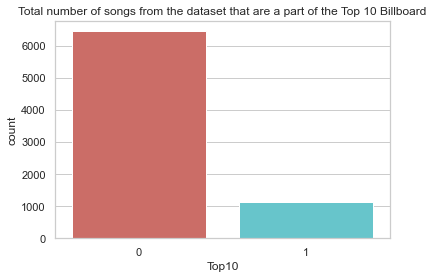

<Figure size 1800x1800 with 0 Axes>

In [108]:
sns.countplot(x = 'Top10', data = data, palette = 'hls')
plt.title('Total number of songs from the dataset that are a part of the Top 10 Billboard')
plt.figure(figsize = (25,25))
plt.show()

In [109]:
count_no_bil = len(data[data['Top10']==0])
count_bil = len(data[data['Top10']==1])
pct_of_no_bil = count_no_bil/(count_no_bil+count_bil)
print("Percentage of Songs which are not in Top10 Billboard", pct_of_no_bil*100)
pct_of_bil = count_bil/(count_no_bil+count_bil)
print("Percentage of Songs which are in Top10 Billboard", pct_of_bil*100)

Percentage of Songs which are not in Top10 Billboard 85.22577237919198
Percentage of Songs which are in Top10 Billboard 14.774227620808029


In [110]:
print(data.columns)

Index(['year', 'songtitle', 'artistname', 'songID', 'artistID',
       'timesignature', 'timesignature_confidence', 'loudness', 'tempo',
       'tempo_confidence', 'key', 'key_confidence', 'energy', 'pitch',
       'timbre_0_min', 'timbre_0_max', 'timbre_1_min', 'timbre_1_max',
       'timbre_2_min', 'timbre_2_max', 'timbre_3_min', 'timbre_3_max',
       'timbre_4_min', 'timbre_4_max', 'timbre_5_min', 'timbre_5_max',
       'timbre_6_min', 'timbre_6_max', 'timbre_7_min', 'timbre_7_max',
       'timbre_8_min', 'timbre_8_max', 'timbre_9_min', 'timbre_9_max',
       'timbre_10_min', 'timbre_10_max', 'timbre_11_min', 'timbre_11_max',
       'Top10'],
      dtype='object')


In [111]:
data_train = data[data['year'] <=  2009]
data_test = data[data['year'] == 2010]

In [112]:
print(data_test)

     year                           songtitle         artistname  \
0    2010  This Is the House That Doubt Built  A Day to Remember   
1    2010                     Sticks & Bricks  A Day to Remember   
2    2010                          All I Want  A Day to Remember   
3    2010                    It's Complicated  A Day to Remember   
4    2010                           2nd Sucks  A Day to Remember   
..    ...                                 ...                ...   
368  2010                All Because of Jesus    Various Artists   
369  2010                           Your Name    Various Artists   
370  2010                           You Reign    Various Artists   
371  2010                    New Song We Sing    Various Artists   
372  2010                             BedRock        Young Money   

                 songID            artistID  timesignature  \
0    SOBGGAB12C5664F054  AROBSHL1187B9AFB01              3   
1    SOPAQHU1315CD47F31  AROBSHL1187B9AFB01              4 

In [113]:
print(data_train)

      year               songtitle artistname              songID  \
373   2009     The Awkward Goodbye    Athlete  SOUALGK12AB017FC37   
374   2009            Rubik's Cube    Athlete  SOGPIQC12AB0182B15   
375   2009        Superhuman Touch    Athlete  SOBNYZN13774E81F76   
376   2009             The Getaway    Athlete  SOHFEOA1366EE931DD   
377   2009         Black Swan Song    Athlete  SOXXSMX12AB017F7B3   
...    ...                     ...        ...                 ...   
7569  1990              She's Gone        Y&T  SOSIEQB12A6D4FC59D   
7570  1990              Let It Out        Y&T  SOIGIQI12A6D4FC59E   
7571  1990              Ten Lovers        Y&T  SOLNEQO12A6D4FC59F   
7572  1990  Goin' Off The Deep End        Y&T  SOEMJEP12A58A7E7B5   
7573  1990               Surrender        Y&T  SOLBQSX12A6D4FC5A0   

                artistID  timesignature  timesignature_confidence  loudness  \
373   ARDW3YJ1187FB4CCE5              3                     0.732    -6.320   
374   ARDW3YJ

In [114]:
data_train.pop("year")
data_train.pop("songtitle")
data_train.pop("artistname")
data_train.pop("songID")
data_train.pop("artistID")
print(data_train.columns)

Index(['timesignature', 'timesignature_confidence', 'loudness', 'tempo',
       'tempo_confidence', 'key', 'key_confidence', 'energy', 'pitch',
       'timbre_0_min', 'timbre_0_max', 'timbre_1_min', 'timbre_1_max',
       'timbre_2_min', 'timbre_2_max', 'timbre_3_min', 'timbre_3_max',
       'timbre_4_min', 'timbre_4_max', 'timbre_5_min', 'timbre_5_max',
       'timbre_6_min', 'timbre_6_max', 'timbre_7_min', 'timbre_7_max',
       'timbre_8_min', 'timbre_8_max', 'timbre_9_min', 'timbre_9_max',
       'timbre_10_min', 'timbre_10_max', 'timbre_11_min', 'timbre_11_max',
       'Top10'],
      dtype='object')


In [115]:
data_test.pop("year")
data_test.pop("songtitle")
data_test.pop("artistname")
data_test.pop("songID")
data_test.pop("artistID")
print(data_test.columns)

Index(['timesignature', 'timesignature_confidence', 'loudness', 'tempo',
       'tempo_confidence', 'key', 'key_confidence', 'energy', 'pitch',
       'timbre_0_min', 'timbre_0_max', 'timbre_1_min', 'timbre_1_max',
       'timbre_2_min', 'timbre_2_max', 'timbre_3_min', 'timbre_3_max',
       'timbre_4_min', 'timbre_4_max', 'timbre_5_min', 'timbre_5_max',
       'timbre_6_min', 'timbre_6_max', 'timbre_7_min', 'timbre_7_max',
       'timbre_8_min', 'timbre_8_max', 'timbre_9_min', 'timbre_9_max',
       'timbre_10_min', 'timbre_10_max', 'timbre_11_min', 'timbre_11_max',
       'Top10'],
      dtype='object')


In [116]:
data.pop("year")
data.pop("songtitle")
data.pop("artistname")
data.pop("songID")
data.pop("artistID")
print(data.columns)

Index(['timesignature', 'timesignature_confidence', 'loudness', 'tempo',
       'tempo_confidence', 'key', 'key_confidence', 'energy', 'pitch',
       'timbre_0_min', 'timbre_0_max', 'timbre_1_min', 'timbre_1_max',
       'timbre_2_min', 'timbre_2_max', 'timbre_3_min', 'timbre_3_max',
       'timbre_4_min', 'timbre_4_max', 'timbre_5_min', 'timbre_5_max',
       'timbre_6_min', 'timbre_6_max', 'timbre_7_min', 'timbre_7_max',
       'timbre_8_min', 'timbre_8_max', 'timbre_9_min', 'timbre_9_max',
       'timbre_10_min', 'timbre_10_max', 'timbre_11_min', 'timbre_11_max',
       'Top10'],
      dtype='object')


In [117]:
data.groupby('Top10').mean()

,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,key,key_confidence,energy,pitch,timbre_0_min,...,timbre_7_min,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max
Top10,,,,,,,,,,,,,,,,,,,,,
0,3.884586,0.847137,-8.657539,107.374397,0.612104,5.341286,0.432682,0.687330,0.011600,3.820087,...,-82.518146,95.192264,-63.043306,49.075552,-58.892488,66.768875,-87.318254,54.485526,-49.921841,46.730359
1,3.948168,0.888900,-9.738632,107.197535,0.684950,5.634495,0.440539,0.607062,0.006298,5.868760,...,-94.663714,98.312272,-67.515134,55.721831,-63.106097,75.291767,-87.465813,61.492297,-56.329054,51.877264


In [118]:
data.groupby('Top10').var()

,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,key,key_confidence,energy,pitch,timbre_0_min,...,timbre_7_min,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max
Top10,,,,,,,,,,,,,,,,,,,,,
0,0.295478,0.061134,18.258560,621.896447,0.093758,12.684405,0.075514,0.060585,0.000208,67.837864,...,775.701318,738.510610,256.691602,201.860343,304.565159,411.883160,966.057868,557.318220,132.253883,153.861985
1,0.211980,0.048042,23.375995,530.759169,0.082930,13.156984,0.071920,0.046296,0.000041,95.412838,...,714.220582,615.269336,228.734569,214.033216,228.384232,374.098627,709.598356,497.374263,128.999928,141.484925


Observations:
1. Time signature nearer to 4/4 is morel likely to reach top10
2. Greater the loudness, higher the chances.
3. Lesser the complexity, more will be the confidence, and higher its values

Text(0, 0.5, 'Proportion of songs in Top10')

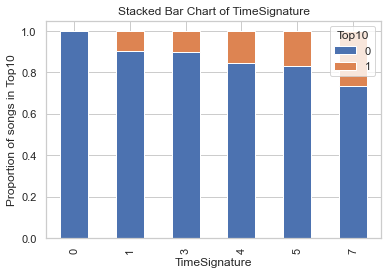

In [119]:
table=pd.crosstab(data['timesignature'],data['Top10'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of TimeSignature')
plt.xlabel('TimeSignature')
plt.ylabel('Proportion of songs in Top10')


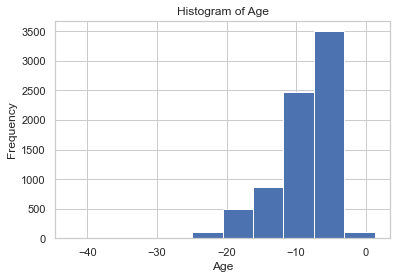

In [98]:
data['loudness'].hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')


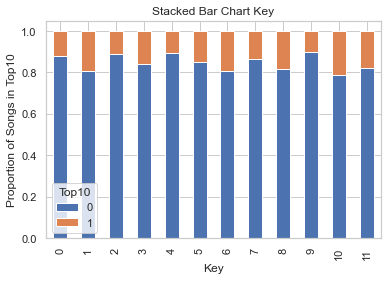

In [152]:
table=pd.crosstab(data['key'],data['Top10'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart Key')
plt.xlabel('Key')
plt.ylabel('Proportion of Songs in Top10')

No impact of keys

In [142]:
X = data.loc[:, data.columns != 'Top10']
y = data.loc[:, data.columns == 'Top10']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Top10'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of Songs not in Top10 Billboard in oversampled data",len(os_data_y[os_data_y['Top10']==0]))
print("Number of Songs in Top10 Billboard",len(os_data_y[os_data_y['Top10']==1]))
print("Proportion of Songs not in Top10 Billboard in oversampled data is ",len(os_data_y[os_data_y['Top10']==0])/len(os_data_X))
print("Proportion of Songs in Top10 Billboard in oversampled data is ",len(os_data_y[os_data_y['Top10']==1])/len(os_data_X))

length of oversampled data is  9706
Number of Songs not in Top10 Billboard in oversampled data 4853
Number of Songs in Top10 Billboard 4853
Proportion of Songs not in Top10 Billboard in oversampled data is  0.5
Proportion of Songs in Top10 Billboard in oversampled data is  0.5


In [143]:
data_final_vars=data.columns.values.tolist()
y=['Top10']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:763: Converge

[False  True  True False  True False False False False  True  True  True
 False  True False  True  True  True  True  True False  True  True  True
  True False  True False False False  True  True  True]
[ 2  1  1  7  1 10  5  6 12  1  1  1  4  1 11  1  1  1  1  1 13  1  1  1
  1  8  1 14  3  9  1  1  1]


c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [144]:
print(data.columns)
data.shape

Index(['timesignature', 'timesignature_confidence', 'loudness', 'tempo',
       'tempo_confidence', 'key', 'key_confidence', 'energy', 'pitch',
       'timbre_0_min', 'timbre_0_max', 'timbre_1_min', 'timbre_1_max',
       'timbre_2_min', 'timbre_2_max', 'timbre_3_min', 'timbre_3_max',
       'timbre_4_min', 'timbre_4_max', 'timbre_5_min', 'timbre_5_max',
       'timbre_6_min', 'timbre_6_max', 'timbre_7_min', 'timbre_7_max',
       'timbre_8_min', 'timbre_8_max', 'timbre_9_min', 'timbre_9_max',
       'timbre_10_min', 'timbre_10_max', 'timbre_11_min', 'timbre_11_max',
       'Top10'],
      dtype='object')


(7574, 34)

In [145]:
cols=['timesignature', 'timesignature_confidence', 'loudness', 'tempo_confidence', 'key', 'timbre_0_min', 'timbre_0_max', 
      'timbre_1_min', 'timbre_3_max', 'timbre_4_min', 'timbre_4_max', 'timbre_5_min', 'timbre_6_min', 'timbre_6_max', 'timbre_7_min', 'timbre_7_max',
      'timbre_8_max', 'timbre_10_max', 'timbre_11_min', 'timbre_11_max'] 
X=os_data_X[cols]
print(X.shape)
y=os_data_y['Top10']

(9706, 20)


In [146]:
cols=['timesignature', 'timesignature_confidence', 'loudness', 'tempo_confidence', 'key', 'timbre_0_min', 'timbre_0_max', 
      'timbre_1_min', 'timbre_3_max', 'timbre_4_min', 'timbre_4_max', 'timbre_5_min', 'timbre_6_min', 'timbre_6_max', 'timbre_7_min', 'timbre_7_max',
      'timbre_8_max', 'timbre_10_max', 'timbre_11_min', 'timbre_11_max'] 
X_test=X_test[cols]
print(X_test.shape)
print(y_test.shape)

(1894, 20)
(1894, 1)


In [147]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X)
xtest = sc_x.transform(X_test)

In [148]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.531638
         Iterations 6
                             Results: Logit
Model:                  Logit              Pseudo R-squared:   0.233     
Dependent Variable:     Top10              AIC:                10360.1501
Date:                   2021-05-05 22:18   BIC:                10503.7601
No. Observations:       9706               Log-Likelihood:     -5160.1   
Df Model:               19                 LL-Null:            -6727.7   
Df Residuals:           9686               LLR p-value:        0.0000    
Converged:              1.0000             Scale:              1.0000    
No. Iterations:         6.0000                                           
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
timesignature            -0.0804   0.055

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(xtrain, y, test_size=0.25, random_state=0)
logreg = LogisticRegression(max_iter = 2000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [151]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.6f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.727235


[[850 324]
 [338 915]]


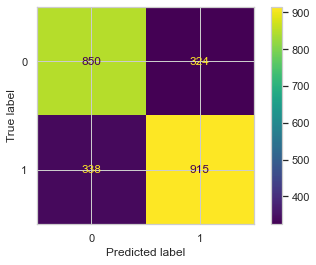

In [154]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

plot = plot_confusion_matrix(logreg, X_test, y_test)

In [126]:
print((332+327)/(659+134+113))

0.7273730684326711


In [150]:
#Accuracy on Training Set

y_pred = logreg.predict(X_train)
print('Accuracy of logistic regression classifier on test set: {:.6f}'.format(logreg.score(X_train, y_train)))

Accuracy of logistic regression classifier on test set: 0.745982
